#**Predicting Global Electric Vehicle Adoption and Growth Trends Using Regression Models (2010–2023)**

#**Linear, Lasso and Ridge Regression**

**Data Source**

Hannah Ritchie (2024) - “Tracking global data on electric vehicles” Published online at OurWorldinData.org. Retrieved from: 'https://ourworldindata.org/electric-car-sales' [Online Resource]

##**INTRODUCTION**

The rapid transition toward sustainable transportation has positioned electric vehicles (EVs) at the center of global decarbonization efforts. This project aims to analyze and predict electric vehicle adoption trends across different countries between 2010 and 2023, using supervised regression models.

The analysis focuses on understanding the relationship between historical EV adoption patterns and future sales performance. By leveraging global electric and hybrid vehicle data, the project explores how various factors such as previous-year electric car share and hybrid car share influence the proportion of electric vehicles sold each year.

**Two key predictive objectives were formulated:**

**Question 1:** Predict the percentage share of electric cars sold in a given year based on the previous year’s sales performance.

**Question 2:** Predict the next year’s growth rate in electric car adoption based on the current year’s sales share.

**The project workflow followed these main steps:**

**Data Collection and Cleaning:** Using datasets from Our World in Data containing yearly EV and hybrid sales share across multiple countries.

**Exploratory Data Analysis (EDA):** Identified leading EV markets, visualized temporal trends, and discovered patterns in adoption behavior.

**Feature Engineering:** Created lag variables (e.g., previous-year EV share) and growth metrics to enhance predictive capability.

**Model Building:** Implemented and compared multiple regression algorithms — Linear Regression, Ridge Regression, and Lasso Regression — to predict EV adoption trends.

**Model Evaluation:** Assessed model accuracy using metrics such as R², Mean Squared Error (MSE), and visual comparison of actual vs predicted values.

This analysis provides valuable insights for policy makers, environmental analysts, and automobile industry stakeholders, enabling data-driven projections of how EV adoption might evolve globally.

IMPORTING USED LIBRARIES

In [572]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Data Download

In [573]:
df=pd.read_excel('/content/EV-car-sales-data.xlsx')
df.head()

,country,Year,%_hybrid_cars_sold,%_electric_cars_sold
0,Australia,2012,0.009280,0.019720
1,Australia,2013,0.011379,0.021621
2,Australia,2014,0.107955,0.042045
3,Australia,2015,0.107955,0.082045
4,Australia,2016,0.076642,0.073358


In [574]:
df.tail()

,country,Year,%_hybrid_cars_sold,%_electric_cars_sold
438,World,2020,1.437037,2.962963
439,World,2021,2.677273,6.622727
440,World,2022,4.264706,10.735294
441,World,2023,5.518248,12.481751
442,World,2024,8.171429,13.828571


confirmation of dataframe information

In [575]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 443 entries, 0 to 442
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   country               443 non-null    object 
 1   Year                  443 non-null    int64  
 2   %_hybrid_cars_sold    443 non-null    float64
 3   %_electric_cars_sold  443 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 14.0+ KB


In [576]:
df.columns

Index(['country', 'Year', '%_hybrid_cars_sold', '%_electric_cars_sold'], dtype='object')

In [577]:
# rows and columns
display(df.shape)

(443, 4)

In [578]:
#summary statistics
df.describe()

,Year,%_hybrid_cars_sold,%_electric_cars_sold
count,443.000000,443.000000,443.000000
mean,2017.826185,3.127413,5.514097
std,3.978340,5.499562,11.214734
min,2010.000000,0.000245,0.000715
25%,2015.000000,0.092314,0.141361
50%,2018.000000,0.549231,0.821739
75%,2021.000000,3.984155,5.340533
max,2024.000000,37.692307,89.162994


In [579]:
#checkimg for missing values
df.isnull()

,country,Year,%_hybrid_cars_sold,%_electric_cars_sold
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
438,False,False,False,False
439,False,False,False,False
440,False,False,False,False
441,False,False,False,False


In [580]:
df.isnull().sum()

,0
country,0
Year,0
%_hybrid_cars_sold,0
%_electric_cars_sold,0


unique countries

In [581]:
print ('The data frame has a total of',df['country'].nunique(), 'countries')

The data frame has a total of 34 countries


year range

In [582]:
print('The years range from',df['Year'].min(), 'to', df['Year'].max())

The years range from 2010 to 2024


**Visual Exploration**

Distribution

/tmp/ipython-input-2703326942.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df['%_electric_cars_sold'],kde=True,bins=10, palette='viridis')


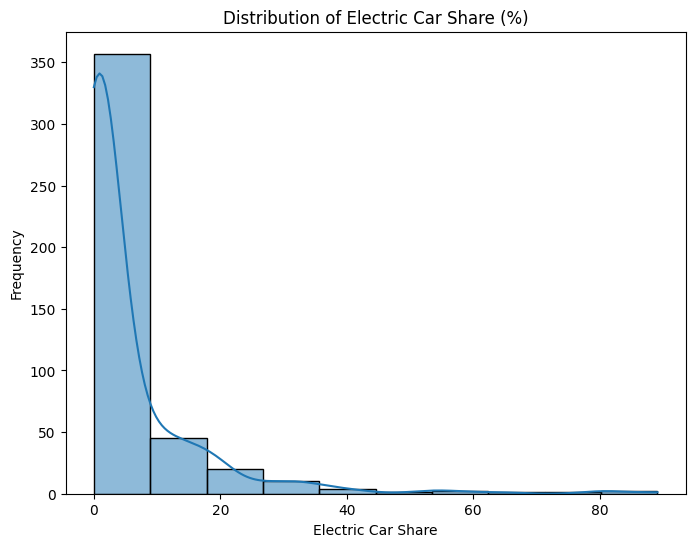

In [583]:
#ELECTRIC CAR DISTRIBUTION
plt.figure(figsize=(8,6))
sns.histplot(df['%_electric_cars_sold'],kde=True,bins=10, palette='viridis')
plt.title("Distribution of Electric Car Share (%)")
plt.xlabel("Electric Car Share")
plt.ylabel("Frequency")
plt.show()

/tmp/ipython-input-2929575750.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df['%_hybrid_cars_sold'],kde=True, bins=10, palette='viridis')


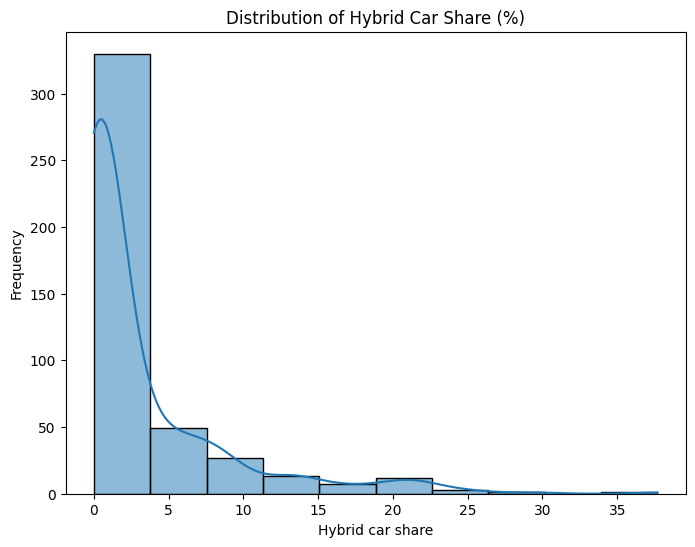

In [584]:
#HYBRID CAR DISTRIBUTION
plt.figure(figsize=(8,6))
sns.histplot(df['%_hybrid_cars_sold'],kde=True, bins=10, palette='viridis')
plt.title('Distribution of Hybrid Car Share (%)')
plt.xlabel('Hybrid car share')
plt.ylabel('Frequency')
plt.show()

correlation heatmap

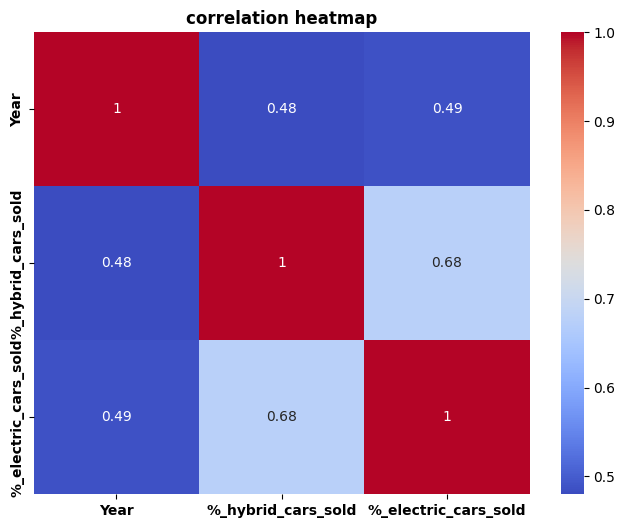

In [585]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('correlation heatmap', fontweight='bold')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.show()

**Hybrid vs. Electric Cars (0.68):**
In years where a higher percentage of hybrid cars were sold, a higher percentage of electric cars were also sold. Both categories tend to grow together.

**Year vs. Car Sales (0.48 and 0.49):** there is a moderate-to-weak positive correlation between the Year and both types of car sales. This suggests a general upward trend over time, where the percentage of both hybrid and electric cars sold has been increasing as the years progress. However, this trend is not as strong as the relationship between hybrid and electric sales themselves.

**hybrid and electric car sales percentages are closely linked and tend to rise in tandem, and both show a positive (though less strong) overall increase as time passes (Year increases).**

##**Trend Analysis**

In [586]:
electric_trend=df.groupby('country')['%_electric_cars_sold'].mean().sort_values(ascending=False).reset_index()

In [587]:
#Top 10 countries that sold Most electric cars
electric_trend.head(10)

,country,%_electric_cars_sold
0,Norway,39.846905
1,Iceland,15.973531
2,Netherlands,10.992341
3,Sweden,10.942834
4,Denmark,9.787543
5,Austria,8.144423
6,Finland,7.622467
7,China,6.862303
8,Switzerland,6.324607
9,Germany,5.236812


/tmp/ipython-input-3945422175.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=electric_trend, x='country', y='%_electric_cars_sold', palette='viridis', legend=False)


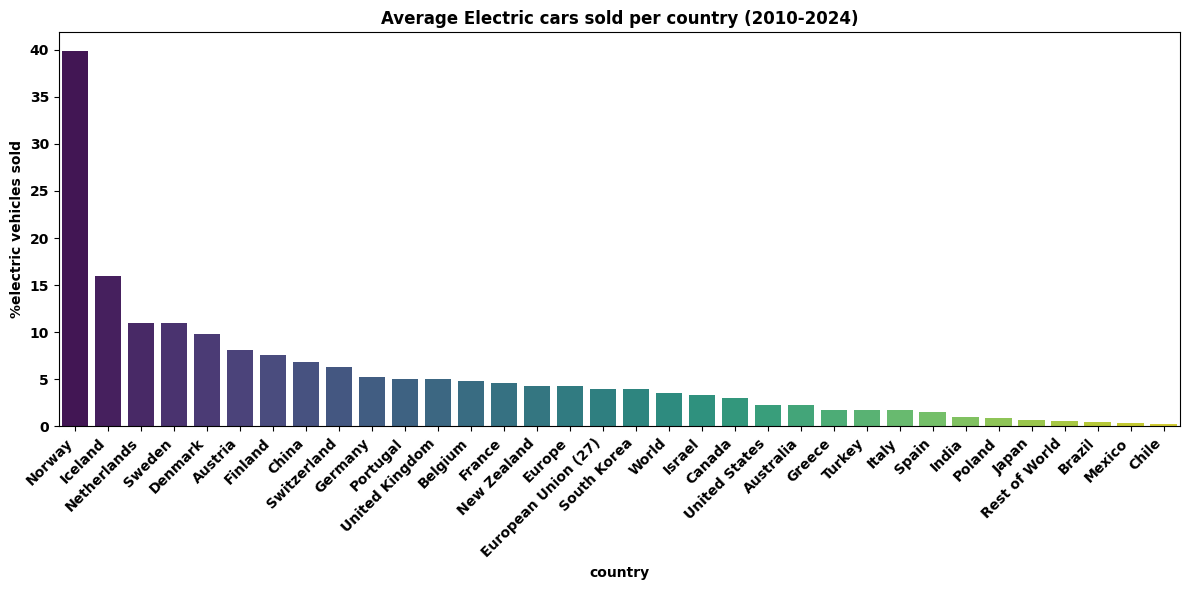

In [588]:
#Average Electric Cars sold per country

plt.figure(figsize=(12, 6))
sns.barplot(data=electric_trend, x='country', y='%_electric_cars_sold', palette='viridis', legend=False)
plt.title('Average Electric cars sold per country (2010-2024)', fontweight='bold')
plt.xlabel('country', fontweight='bold')
plt.ylabel('%electric vehicles sold', fontweight='bold')
plt.xticks(rotation=45, ha='right', fontweight='bold')
plt.yticks(fontweight='bold')
plt.tight_layout()
plt.show()

**electric car share over the years trend**

In [589]:
yearly_trend_electric=df.groupby('Year')['%_electric_cars_sold'].mean().reset_index()
yearly_trend_electric

,Year,%_electric_cars_sold
0,2010,0.009104
1,2011,0.090263
2,2012,0.217603
3,2013,0.410465
4,2014,0.828020
5,2015,0.952453
6,2016,0.934477
7,2017,1.387397
8,2018,2.206141
9,2019,3.376056


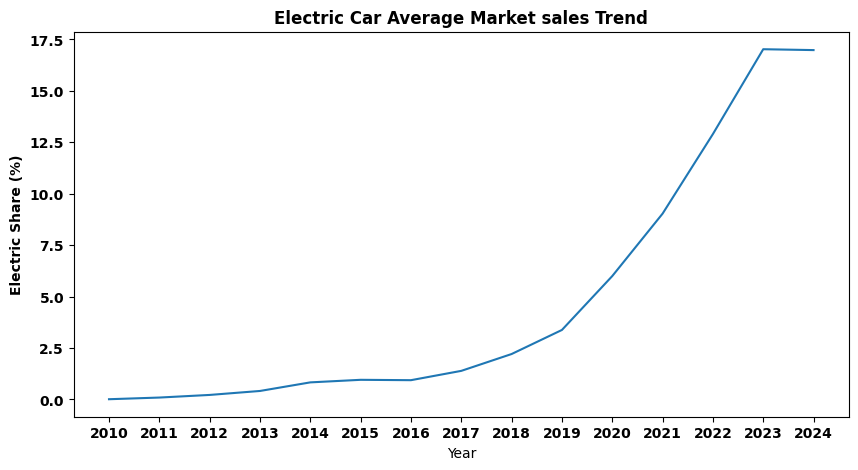

In [590]:
plt.figure(figsize=(10,5))
sns.lineplot(data=yearly_trend_electric, x='Year', y='%_electric_cars_sold', legend=True)
plt.title('Electric Car Average Market sales Trend', fontweight='bold')
plt.ylabel("Electric Share (%)", fontweight='bold')
plt.xticks(yearly_trend_electric['Year'], fontweight='bold')
plt.yticks(fontweight='bold')
plt.show()

In [591]:
hybrid_trend=df.groupby('country')['%_hybrid_cars_sold'].mean().sort_values(ascending=False).reset_index()

In [592]:
#Top 10 countries that sold Most Hybrid
hybrid_trend.head(10)

,country,%_hybrid_cars_sold
0,Iceland,13.128777
1,Sweden,10.498705
2,Norway,10.222326
3,Finland,8.176764
4,Netherlands,5.697659
5,Belgium,5.256031
6,Denmark,4.696028
7,Portugal,4.457760
8,Germany,3.542616
9,Switzerland,3.284679


/tmp/ipython-input-3924486294.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=hybrid_trend,x='country',y='%_hybrid_cars_sold', palette='cividis',)


<function matplotlib.pyplot.show(close=None, block=None)>

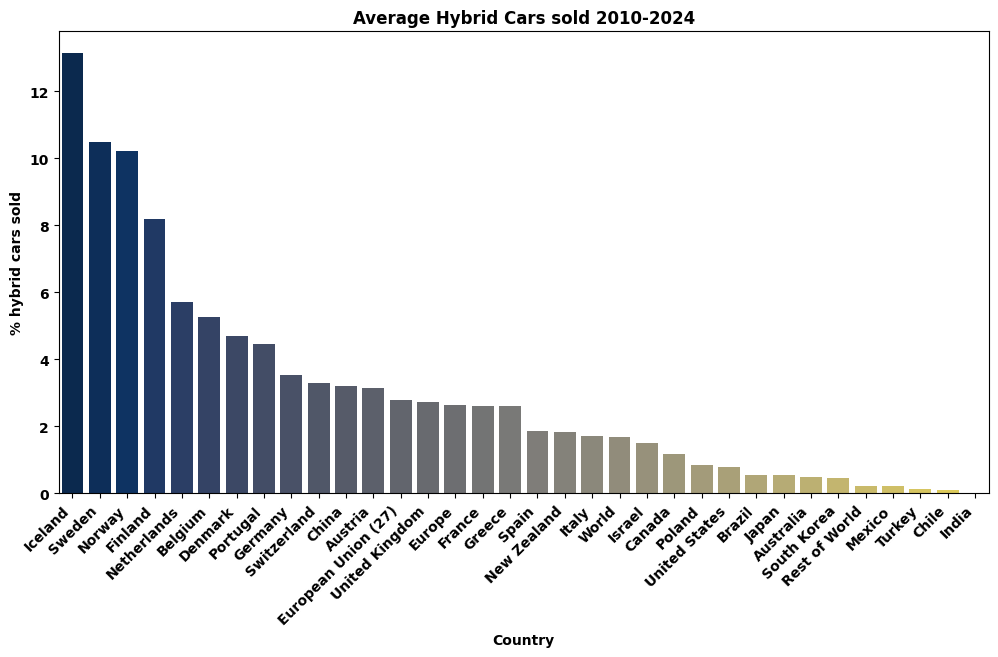

In [593]:
#Average Hybrid cars sold per country
plt.figure(figsize=(12,6))
sns.barplot(data=hybrid_trend,x='country',y='%_hybrid_cars_sold', palette='cividis',)
plt.title('Average Hybrid Cars sold 2010-2024', fontweight='bold')
plt.xlabel('Country', fontweight='bold')
plt.ylabel('% hybrid cars sold',fontweight='bold')
plt.yticks(fontweight='bold')
plt.xticks(fontweight='bold', rotation=45, ha='right')
plt.tight_layout
plt.show

In [594]:
#Hybrid cars market sales Trend
yearly_trend_hybrid=df.groupby('Year')['%_hybrid_cars_sold'].mean().reset_index()
yearly_trend_hybrid

,Year,%_hybrid_cars_sold
0,2010,0.001371
1,2011,0.008270
2,2012,0.107678
3,2013,0.281850
4,2014,0.318619
5,2015,0.518632
6,2016,1.234705
7,2017,1.621178
8,2018,1.979768
9,2019,1.946944


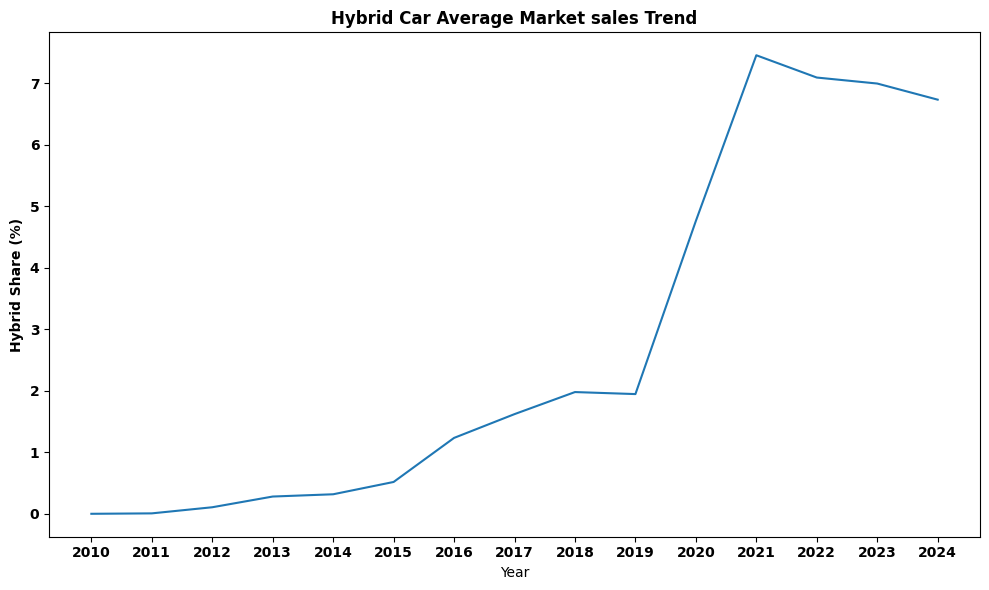

In [595]:
plt.figure(figsize=(10,6))
sns.lineplot(data=yearly_trend_hybrid,x='Year',y='%_hybrid_cars_sold')
plt.title('Hybrid Car Average Market sales Trend', fontweight='bold')
plt.ylabel("Hybrid Share (%)", fontweight='bold')
plt.yticks(fontweight='bold')
plt.xticks(yearly_trend_electric['Year'],fontweight='bold')
plt.tight_layout()
plt.show()

**Hybrid/Electric Relationship**

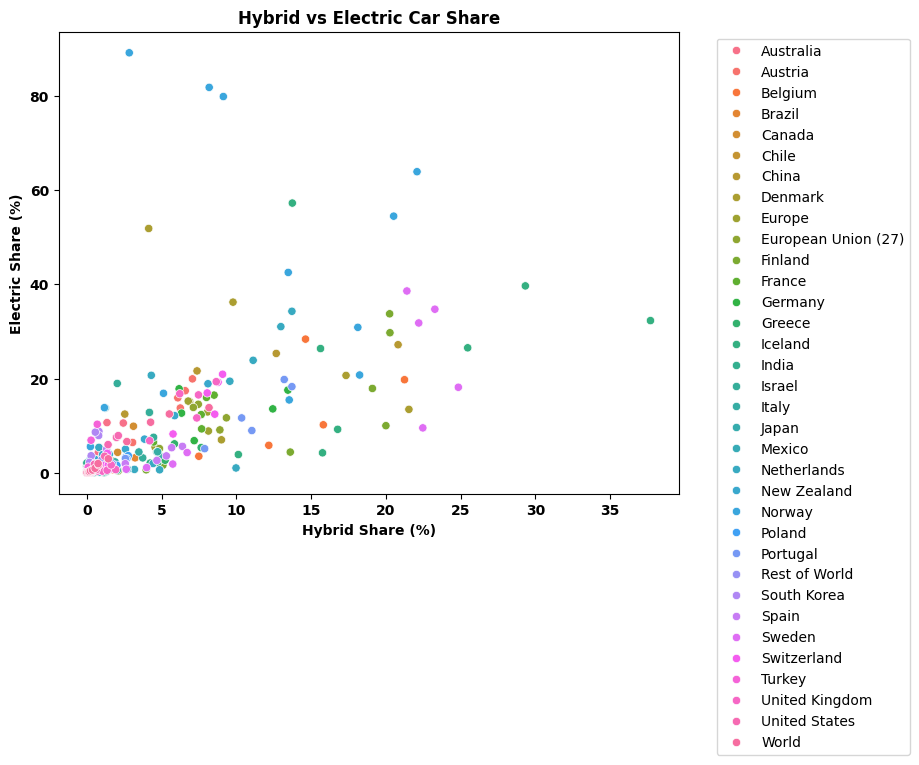

In [596]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='%_hybrid_cars_sold', y='%_electric_cars_sold', hue='country')
plt.title("Hybrid vs Electric Car Share", fontweight='bold')
plt.xlabel("Hybrid Share (%)", fontweight='bold')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.ylabel("Electric Share (%)", fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',)
plt.show()

1. There appears to be a weak or no **positive correlation** between the Hybrid Car Share and the Electric Car Share globally. This means that **a high market share for hybrid cars** in a country does not necessarily guarantee **a high market share for pure electric cars**, and vice versa. Some countries may prioritize one technology over the other due to specific policies, incentives, or infrastructure.

2. The countries with **>80% Electric Share** are a global leaders in pure EV adoption.

3. The countries with approx **38% Hybrid Share** have the highest hybrid adoption represented.

4. countries with a **Hybrid Share >20%** and **Electric Share >30%** are the countries with high overall adoption of both types of electrified vehicles.

**Growth Rate**

**electric vehicles sales growth Rate**

In [597]:
#Electric Vehicles sales growth Rate
df['Electric_Growth'] = df.groupby('country')['%_electric_cars_sold'].pct_change() * 100

/tmp/ipython-input-2855247807.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='country', y='Electric_Growth', palette='viridis')


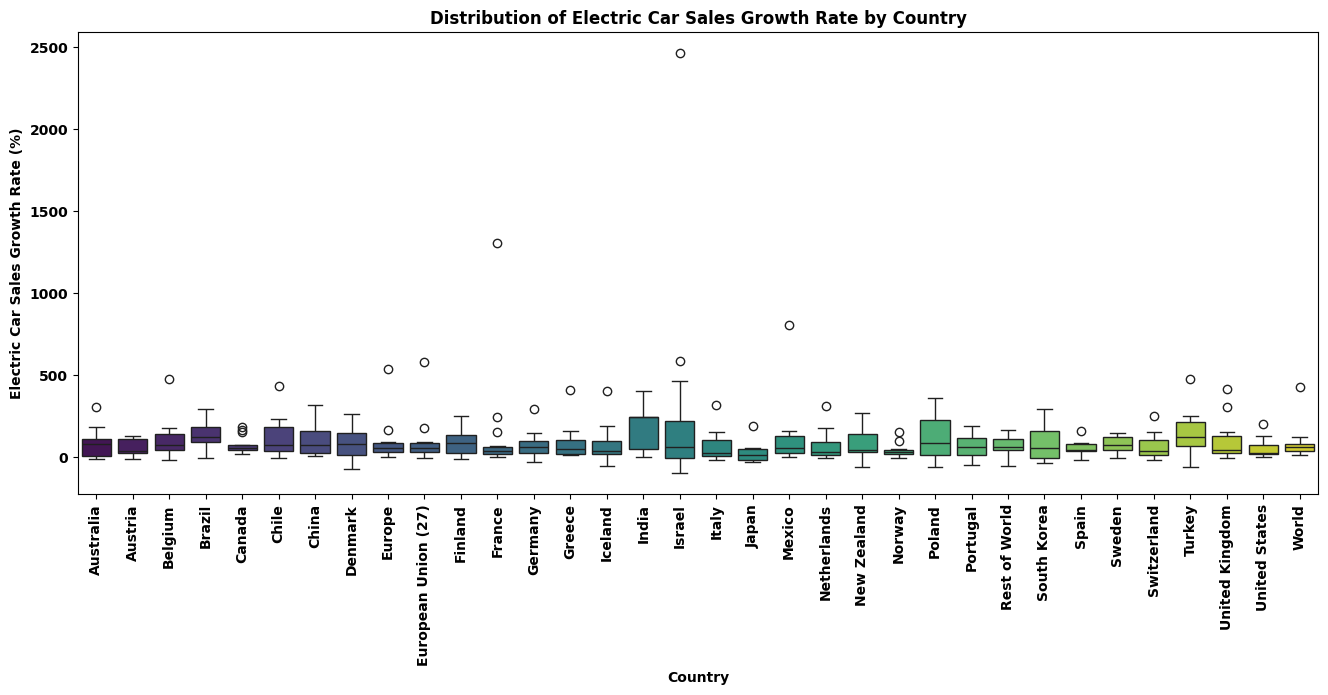

In [598]:
plt.figure(figsize=(16,6))
sns.boxplot(data=df, x='country', y='Electric_Growth', palette='viridis')
plt.title('Distribution of Electric Car Sales Growth Rate by Country', fontweight='bold')
plt.xlabel('Country', fontweight='bold')
plt.xticks(fontweight='bold')
plt.ylabel('Electric Car Sales Growth Rate (%)', fontweight='bold')
plt.yticks(fontweight='bold')
plt.xticks(rotation=90)
plt.show()

1. **Highest Median Growth (green line)**: Countries like Iceland, China, and India have their median line positioned higher than most others (around 50-100% growth). This indicates that in a typical year, they sustain a high rate of electric car sales growth.

2. **Greatest Volatility (Longest Box/Whiskers)**: Italy and Japan show the most extended boxes, suggesting their year-to-year growth is highly unpredictable, with periods of stagnation followed by extreme spikes.

3. **Lowest and Most Consistent Growth**: Countries like the United States, Germany, and the United Kingdom have boxes centered around 0-50% and are relatively short. This suggests a more moderate, stable, and less volatile (though still positive) growth rate compared to the extreme outliers.

**hybrid vehicles sales growth rate**

In [599]:
df['hybrid_growth'] = df.groupby('country')['%_hybrid_cars_sold'].pct_change() * 100


/tmp/ipython-input-3467130649.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x='country',y='hybrid_growth', palette='viridis')


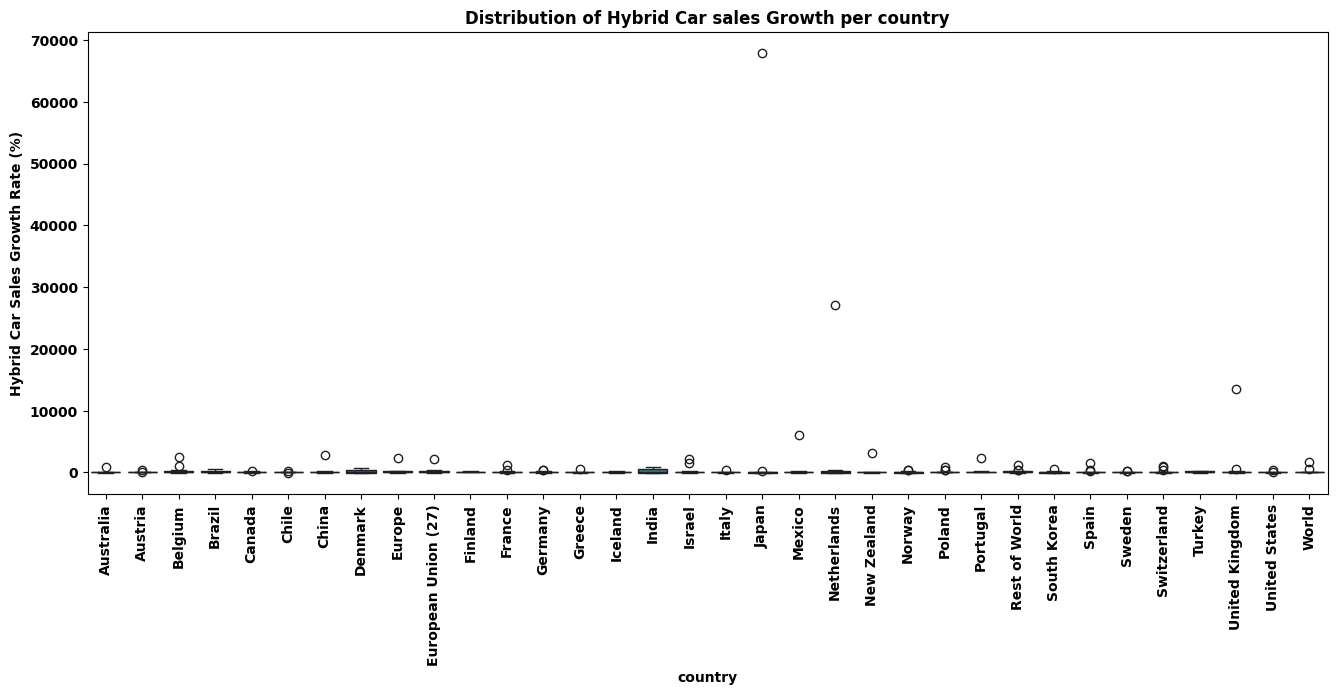

In [600]:
plt.figure(figsize=(16,6))
sns.boxplot(data=df,x='country',y='hybrid_growth', palette='viridis')
plt.title('Distribution of Hybrid Car sales Growth per country', fontweight='bold')
plt.xlabel('country',fontweight='bold')
plt.ylabel('Hybrid Car Sales Growth Rate (%)', fontweight='bold')
plt.yticks(fontweight='bold')
plt.xticks(rotation=90,fontweight='bold')
plt.show()

1. **Most Countries:** The vast majority of countries (e.g., Australia, Austria, Belgium, Canada, China, France, Germany, Netherlands, Sweden, United Kingdom) show a similar pattern: a tiny box/low IQR and median, with a few small outliers or a moderate upper whisker. This suggests a consistently low to moderate typical annual growth rate, but with a few years of higher growth.

2. **Rest of World:** The "Rest of World" category has a very small box and IQR, but the upper whisker extends a bit higher than many single countries, indicating some years of higher growth when aggregating all smaller markets.

3. **"World":** Shows a distribution very similar to the average country, with its central tendency near zero and an outlier around 12,000 vehicles sold.

4. **Japan :** Exhibits the single highest recorded growth rate, nearly reaching 70,000% growth rate.

5. **Mexico:** Has a very high outlier, around 28,000% growth rate.

6. **Italy , United States , and World:** Also show significant outliers, typically around 10,000 to 15,000% growth rate.

##**REGRESSION MODELS FOR PATTERN PREDICTION**

**libraries for Regression used**

In [601]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.pipeline import Pipeline

###**AIM OF THE REGRESSION MODELS CREATED**

1. **To Train a model to predict how many electric cars will be sold (as of share) in a year based on the previous years cars sold (as a share)**

2. **To train a model to predict next years growth in %_electric_cars sold based on the current years %_electric_cars_sold (Predicting Year-Over-Year Growth in Electric Vehicle Adoption)**

dataframe preparation

In [602]:
df1 = df[['country', 'Year','%_hybrid_cars_sold','%_electric_cars_sold']]
df1

,country,Year,%_hybrid_cars_sold,%_electric_cars_sold
0,Australia,2012,0.009280,0.019720
1,Australia,2013,0.011379,0.021621
2,Australia,2014,0.107955,0.042045
3,Australia,2015,0.107955,0.082045
4,Australia,2016,0.076642,0.073358
...,...,...,...,...
438,World,2020,1.437037,2.962963
439,World,2021,2.677273,6.622727
440,World,2022,4.264706,10.735294
441,World,2023,5.518248,12.481751


In [603]:
print(df1.shape)
print(df1.columns)
display(df1.head())

(443, 4)
Index(['country', 'Year', '%_hybrid_cars_sold', '%_electric_cars_sold'], dtype='object')


,country,Year,%_hybrid_cars_sold,%_electric_cars_sold
0,Australia,2012,0.009280,0.019720
1,Australia,2013,0.011379,0.021621
2,Australia,2014,0.107955,0.042045
3,Australia,2015,0.107955,0.082045
4,Australia,2016,0.076642,0.073358


In [604]:
df1['Year'].dtype

dtype('int64')

In [605]:
#Confirming the cleanliness of the dataframe. i.e the dataframe must have no missing value
df1.isnull().sum()

,0
country,0
Year,0
%_hybrid_cars_sold,0
%_electric_cars_sold,0


**Feature engineering the dataframe to fit needed elements**

creating lag feature for the model to understand chronology of timeframe

In [606]:
#sorting and creating lag feature
df1=df1.sort_values(['country', 'Year']).reset_index(drop=True)
df1

,country,Year,%_hybrid_cars_sold,%_electric_cars_sold
0,Australia,2012,0.009280,0.019720
1,Australia,2013,0.011379,0.021621
2,Australia,2014,0.107955,0.042045
3,Australia,2015,0.107955,0.082045
4,Australia,2016,0.076642,0.073358
...,...,...,...,...
438,World,2020,1.437037,2.962963
439,World,2021,2.677273,6.622727
440,World,2022,4.264706,10.735294
441,World,2023,5.518248,12.481751


In [607]:
#lag feature for last years electric sales
df1['electric_previous_year'] = df1.groupby('country')['%_electric_cars_sold'].shift(1)


In [608]:
#2-year rolling mean (helps smooth noise)
df1['electric_roll_2'] = df1.groupby('country')['%_electric_cars_sold'].rolling(window=2, min_periods=1).mean().reset_index(0,drop=True)


In [609]:
# Growth (difference) from previous year
df1['electric_growth'] = df1['%_electric_cars_sold'] - df1['electric_previous_year']


In [610]:
# Year since start. the first year that the model should start with and understand
df1['year_since_start'] = df1['Year'] - df1['Year'].min()

In [611]:
# Filling lag NaNs (first year) — choose an approach. Here we fill with the country's mean electric sales (or 0)
df1['electric_previous_year'] = df1.groupby('country')['electric_previous_year'].transform(lambda s: s.fillna(s.mean()))
df1['electric_previous_year'] = df1['electric_previous_year'].fillna(0)  # fallback

for hybrid

In [612]:
# If Hybrid_Share has gaps, fill with country mean
df1['Hybrid_Share'] = df1.groupby('country')['%_hybrid_cars_sold'].transform(lambda s: s.fillna(s.mean()))
df1['Hybrid_Share'] = df1['%_hybrid_cars_sold'].fillna(0)

target variable that will predict next years sales

In [613]:
# Creating the target variable for the first regression model (predicting next year's sales)
df1['electric_target'] = df1.groupby('country')['%_electric_cars_sold'].shift(-1)

engineered columns

In [614]:
display(df1[['country','Year','%_electric_cars_sold','electric_previous_year','electric_roll_2','electric_growth','Hybrid_Share']].head(10))

,country,Year,%_electric_cars_sold,electric_previous_year,electric_roll_2,electric_growth,Hybrid_Share
0,Australia,2012,0.019720,1.621082,0.019720,NaN,0.009280
1,Australia,2013,0.021621,0.019720,0.020670,0.001901,0.011379
2,Australia,2014,0.042045,0.021621,0.031833,0.020425,0.107955
3,Australia,2015,0.082045,0.042045,0.062045,0.040000,0.107955
4,Australia,2016,0.073358,0.082045,0.077702,-0.008688,0.076642
5,Australia,2017,0.130435,0.073358,0.101896,0.057077,0.119565
6,Australia,2018,0.205000,0.130435,0.167717,0.074565,0.205000
7,Australia,2019,0.821739,0.205000,0.513370,0.616739,0.378261
8,Australia,2020,0.828986,0.821739,0.825362,0.007246,0.271014
9,Australia,2021,2.333333,0.828986,1.581159,1.504348,0.466667


###**TASK 1 To Train a model to predict how many electric cars will be sold (as of share) in a year based on the previous years cars sold (as a share)**

**ENCODING, DEFINING FEATURES AND TARGET AND SPLITTING AND TRAINING THE DATAFRAME**

In [615]:

q1_df1 = df1.copy().dropna(subset=['%_electric_cars_sold', '%_hybrid_cars_sold', 'electric_previous_year'])

# Encoding countries if few in number
country_count = q1_df1['country'].nunique()
print("Number of countries:", country_count)

if country_count <= 30:
    q1_df1 = pd.get_dummies(q1_df1, columns=['country'], drop_first=True)

# Defining features and target
X = q1_df1[['Year', '%_hybrid_cars_sold', 'electric_previous_year']]
y = q1_df1['%_electric_cars_sold']

# Splittig into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Train shape:", X_train.shape, "Test shape:", X_test.shape)


Number of countries: 34
Train shape: (354, 3) Test shape: (89, 3)


###**Predicting with simple linear regression**

R2 SCORE Q1: 0.9545630103525461
MEAN SQUARED ERROR Q1: 6.0126226607761994
ROOT MEAN SQUARE ERROR: 2.452064978905779
MEAN ABSOLUTE ERROR (MAE): 1.4071029413856933
LINEAR REGRESSION RESULTS:  R2 SCORE>> 0.9545630103525461,MSE SCORE>>6.0126226607761994, RMSE SCORE>>2.452064978905779, MAE SCORE>>1.4071029413856933


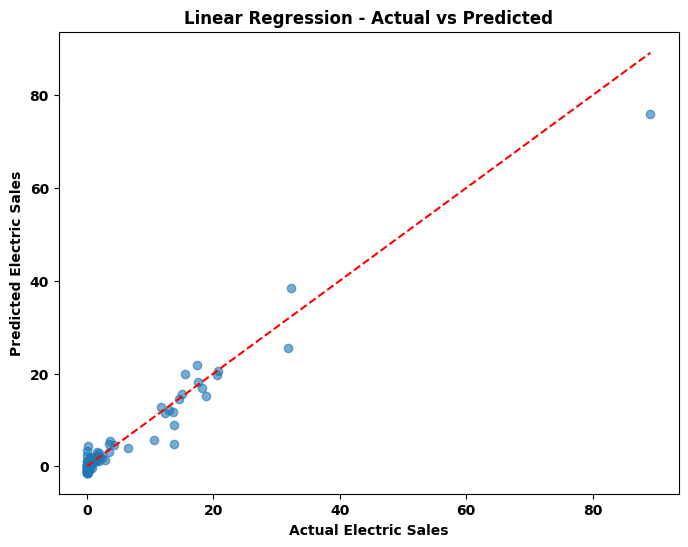

In [616]:
# Creating a pipeline: scaling + linear regression
linear_model = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LinearRegression())
])

# Fitting and predicting
linear_model.fit(X_train, y_train)
y_pred_lin = linear_model.predict(X_test)

# Evaluating

#R2 SCORE LINEAR TASK 1
r2_score_linearq1=r2_score(y_test,y_pred_lin)
print('R2 SCORE Q1:', r2_score_linearq1)

#MSE ERROR LINEAR TASK 1
mse_linearq1=mean_squared_error(y_test,y_pred_lin)
print('MEAN SQUARED ERROR Q1:',mse_linearq1)


#RMSE (ROOT MEAN SQUARE ERROR)>>>>>RMSE is THE SQUARE ROOT OF MSE
rmse_linearq1 = np.sqrt(mse_linearq1)
print('ROOT MEAN SQUARE ERROR:', rmse_linearq1)

#MEAN ABSOLUTE ERROR (MAE)
mae_linearq1 = mean_absolute_error(y_test, y_pred_lin)
print('MEAN ABSOLUTE ERROR (MAE):',mae_linearq1)


print(f'LINEAR REGRESSION RESULTS:  R2 SCORE>> {r2_score_linearq1},MSE SCORE>>{mse_linearq1}, RMSE SCORE>>{rmse_linearq1}, MAE SCORE>>{mae_linearq1}')

# Ploting actual vs predicted
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_lin, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Electric Sales", fontweight='bold')
plt.ylabel("Predicted Electric Sales", fontweight='bold')
plt.yticks(fontweight='bold')
plt.xticks(fontweight='bold')
plt.title("Linear Regression - Actual vs Predicted", fontweight='bold')
plt.show()

###**Predicting with Ridge Regression**

R2 SCORE RIDGE TASK 1: 0.9485290589867766
MEAN SQUARE ERROR RIDGE TASK 1: 6.811088250097662
ROOT MEAN SQUARE ERROR (RMSE): 2.6098061709823708
MEAN ABSOLUTE ERROR: 1.429747523689677
RIDGE REGRESSION MODEL RESULTS: R2 SCORE>>0.9485290589867766, MSE SCORE>> 6.811088250097662, RMSE SCORE>> 2.6098061709823708, MAE SCORE>> 1.429747523689677


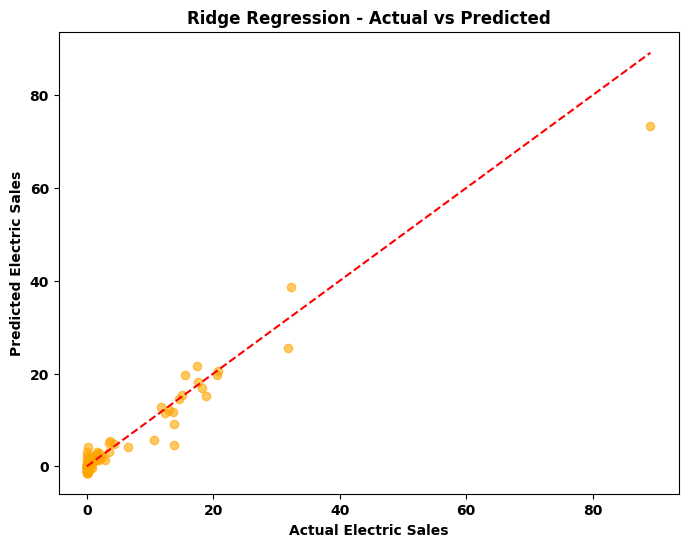

In [617]:
ridge_model = Pipeline([
    ('scaler', StandardScaler()),
    ('model', Ridge(alpha=10))
])

ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)

#R2 SCORE RIDGE TASK 1
r2_score_ridgeq1=r2_score(y_test,y_pred_ridge)
print('R2 SCORE RIDGE TASK 1:', r2_score_ridgeq1)

#MSE VALUE RIDGE TASK1
mse_score_ridgeq1=mean_squared_error(y_test,y_pred_ridge)
print('MEAN SQUARE ERROR RIDGE TASK 1:', mse_score_ridgeq1)

#ROOT MEAN SQUARE ERROR (RMSE)
rmse_ridgeq1=np.sqrt(mse_score_ridgeq1)
print('ROOT MEAN SQUARE ERROR (RMSE):', rmse_ridgeq1)

#MEAN ABSOLUTE ERROR RIDGE TASK 1
mae_ridgeq1=mean_absolute_error(y_test,y_pred_ridge)
print('MEAN ABSOLUTE ERROR:', mae_ridgeq1)

print(f'RIDGE REGRESSION MODEL RESULTS: R2 SCORE>>{r2_score_ridgeq1}, MSE SCORE>> {mse_score_ridgeq1}, RMSE SCORE>> {rmse_ridgeq1}, MAE SCORE>> {mae_ridgeq1}')



plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_ridge, alpha=0.6, color='orange')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Electric Sales", fontweight='bold')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.ylabel("Predicted Electric Sales", fontweight='bold')
plt.title("Ridge Regression - Actual vs Predicted", fontweight='bold')
plt.show()

###**Predicting with Lasso Regression**

R2 SCORE LASSO TASK 1 0.9545001745081318
MEAN SQUARED ERROR LASSO TASK 1 6.0209376531418
ROOT MEAN SQUARED ERROR 2.4537599012824787
MEAN ABSOLUTE ERROR 1.4046803594106196
LASSO REGRESSION MODEL RESULTS: R2 SCORE>> 0.9545001745081318, MSE SCORE>>6.0209376531418, RMSE SCORE>>2.4537599012824787, MAE SCORE>>1.4046803594106196


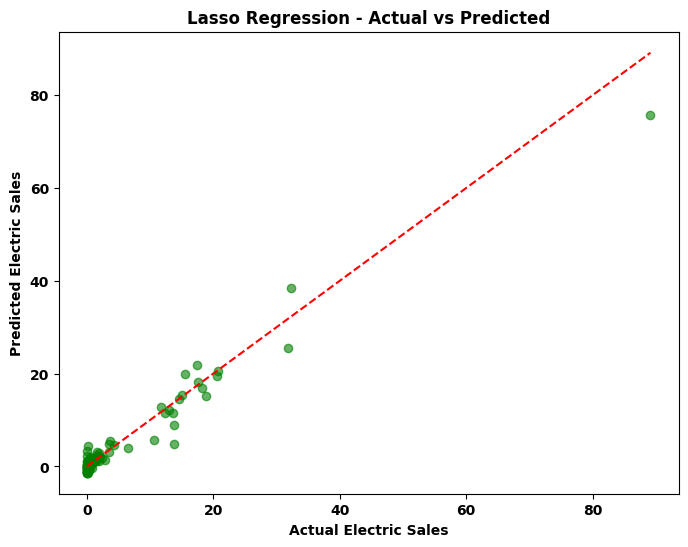

In [618]:
lasso_model = Pipeline([
    ('scaler', StandardScaler()),
    ('model', Lasso(alpha=0.01))
])

lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)

#R2 SCORE LASSO TASK 1
r2_score_lassoq1=r2_score(y_test,y_pred_lasso)
print('R2 SCORE LASSO TASK 1', r2_score_lassoq1)

#MEAN SQUARED ERROR LASSO TASK1
mse_lassoq1=mean_squared_error(y_test,y_pred_lasso)
print('MEAN SQUARED ERROR LASSO TASK 1', mse_lassoq1)

#ROOT MEAN SQUARE (RMSE) LASSO TASK 1
rmse_lassoq1=np.sqrt(mse_lassoq1)
print('ROOT MEAN SQUARED ERROR', rmse_lassoq1)

#MEAN ABSOLUTE ERROR
mae_lassoq1=mean_absolute_error(y_test,y_pred_lasso)
print('MEAN ABSOLUTE ERROR', mae_lassoq1)


print(f'LASSO REGRESSION MODEL RESULTS: R2 SCORE>> {r2_score_lassoq1}, MSE SCORE>>{mse_lassoq1}, RMSE SCORE>>{rmse_lassoq1}, MAE SCORE>>{mae_lassoq1}')


plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_lasso, alpha=0.6, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Electric Sales", fontweight='bold')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.ylabel("Predicted Electric Sales",fontweight='bold')
plt.title("Lasso Regression - Actual vs Predicted",fontweight='bold')
plt.show()


###**Result comparison**

In [619]:
results = pd.DataFrame({
    'Model': ['Linear', 'Ridge', 'Lasso'],
    'R2': [r2_score_linearq1, r2_score_ridgeq1, r2_score_lassoq1],
    'RMSE': [rmse_linearq1, rmse_ridgeq1, rmse_lassoq1],
    'MAE': [mae_linearq1, mae_ridgeq1, mae_lassoq1]
})
results.sort_values('R2', ascending=False, inplace=True)
display(results)


,Model,R2,RMSE,MAE
0,Linear,0.954563,2.452065,1.407103
2,Lasso,0.954500,2.453760,1.404680
1,Ridge,0.948529,2.609806,1.429748


###**Model Performance Comparison**

/tmp/ipython-input-2031226002.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_q1, x='Model', y='R2', palette='Reds')
/tmp/ipython-input-2031226002.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_q1, x='Model', y='MSE', palette='viridis')


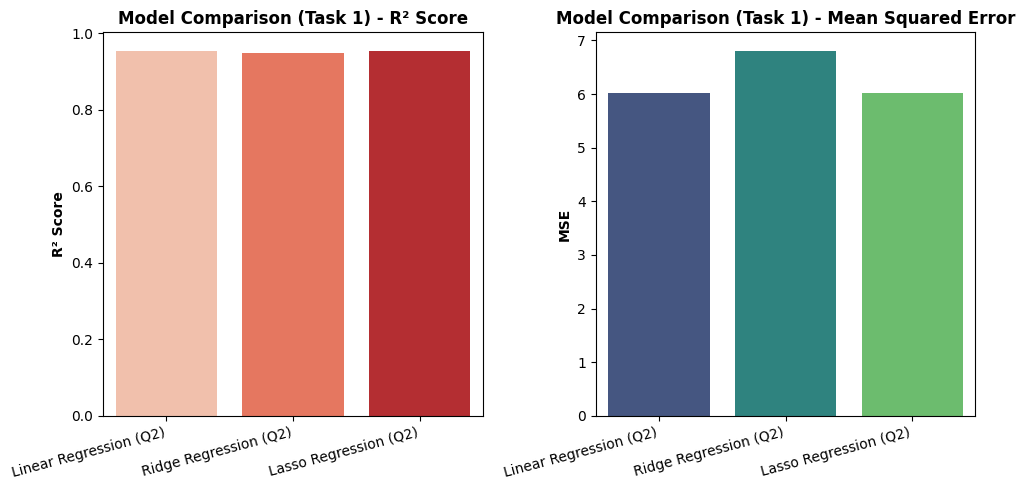

,Model,R2,MSE
0,Linear Regression (Q2),0.954563,6.012623
2,Lasso Regression (Q2),0.954500,6.020938
1,Ridge Regression (Q2),0.948529,6.811088


In [620]:
#Creating a comparison DataFrame using the existing variables
results_q1 = pd.DataFrame({
    'Model': ['Linear Regression (Q2)', 'Ridge Regression (Q2)', 'Lasso Regression (Q2)'],
    'R2': [r2_score_linearq1, r2_score_ridgeq1, r2_score_lassoq1],
    'MSE': [mse_linearq1, mse_score_ridgeq1, mse_lassoq1]
})

#Plotting performance comparison ---
plt.figure(figsize=(10,5))

# Plotting R² scores
plt.subplot(1, 2, 1)
sns.barplot(data=results_q1, x='Model', y='R2', palette='Reds')
plt.title("Model Comparison (Task 1) - R² Score", fontweight='bold')
plt.ylabel("R² Score", fontweight='bold')
plt.xlabel("")
plt.xticks(rotation=15, ha='right')

# Plotting MSE values
plt.subplot(1, 2, 2)
sns.barplot(data=results_q1, x='Model', y='MSE', palette='viridis')
plt.title("Model Comparison (Task 1) - Mean Squared Error", fontweight='bold')
plt.ylabel("MSE", fontweight='bold')
plt.xlabel("")
plt.xticks(rotation=15, ha='right')

plt.tight_layout()
plt.show()

#Displaying results table
display(results_q1.sort_values('R2', ascending=False))


**MODEL VERDICT FOR TASK 1**

**R2 value of 0.9** shows that model was able to capture **90%** of variance in electric car sales share.

**MSE value of 6** shows that there is a small error when it comes to predicted and actual value

The regression models demonstrate high predictive power, explaining approximately **90%** of the variability in electric vehicle sales share across years.

This suggests that past electric car adoption trends are highly indicative of future adoption rates, making this model reliable for forecasting near-term EV growth.

**Testing the Model to predict 2024 sales**

In [621]:
# Selecting latest available year (2023)
latest_year = df1['Year'].max()
future_df1 = df1[df1['Year'] == latest_year].copy()

# Storing country information separately before potential encoding/reindexing
future_countries = future_df1[['country']].copy()

# Creating 2024 projection input
future_df1['Year'] = future_df1['Year'] + 1  # moving to 2024
future_df1['electric_previous_year'] = future_df1['%_electric_cars_sold']  # 2023 electric share becomes previous year for 2024

# Assuming hybrid share grows slightly (e.g., +5%)
future_df1['%_hybrid_cars_sold'] = future_df1['%_hybrid_cars_sold'] * 1.05


# Selecting only the feature columns needed for prediction
future_features = future_df1[X_train.columns].copy()


# Applying same encoding as before i.e one-hot encoding for countries
if 'country' in q1_df1.columns and any('country_' in c for c in X_train.columns):
    # Although one-hot encoding was applied to training data,
    # we only need the feature columns that resulted from it.
    # The reindex below handles adding any missing dummy columns with 0.
    pass # The one-hot encoding was applied to q1_df1 before splitting, so X_train already has dummy columns if needed. This allows for just align future_features.


# Aligning columns with training set (fill missing with 0)
# This adding dummy variables for countries not in the future_df1 (if any) and ensures order matches X_train
future_features = future_features.reindex(columns=X_train.columns, fill_value=0)

print(future_features.head())

    Year  %_hybrid_cars_sold  electric_previous_year
12  2025            2.559375               10.562500
22  2025            6.909677               17.419355
37  2025           15.355584               28.375635
49  2025            3.386880                3.174400
63  2025            4.391666               12.817460


In [622]:
# Predicting 2024 Electric Share
future_df1['Predicted_Electric_Share_2024'] = ridge_model.predict(future_features)

# Combining with country info for clarity
predictions_2024 = future_countries.copy() # Starting with the stored country info
predictions_2024['Year'] = future_df1['Year'] # Adding the future year
predictions_2024['Predicted_Electric_Share_2024'] = future_df1['Predicted_Electric_Share_2024'] # Adding the predictions

display(predictions_2024.head())

,country,Year,Predicted_Electric_Share_2024
12,Australia,2025,12.150931
22,Austria,2025,19.747406
37,Belgium,2025,32.470365
49,Brazil,2025,6.123790
63,Canada,2025,14.806280


/tmp/ipython-input-1402020932.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=predictions_2024.sort_values('Predicted_Electric_Share_2024', ascending=False),


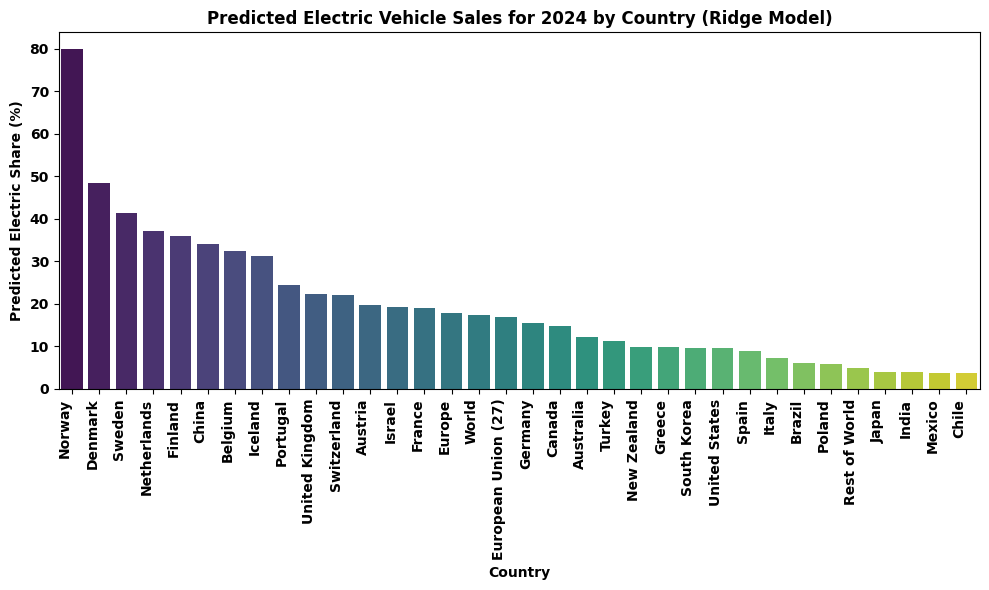

In [623]:
plt.figure(figsize=(10,6))
sns.barplot(data=predictions_2024.sort_values('Predicted_Electric_Share_2024', ascending=False),
            x='country', y='Predicted_Electric_Share_2024', palette='viridis')
plt.title("Predicted Electric Vehicle Sales for 2024 by Country (Ridge Model)", fontweight='bold')
plt.xlabel("Country", fontweight='bold')
plt.ylabel("Predicted Electric Share (%)", fontweight='bold')
plt.yticks(fontweight='bold')
plt.xticks(rotation=90, ha='right', fontweight='bold')
plt.tight_layout()
plt.show()


**Top Performers (High EV Share):** The chart clearly shows that the Nordic countries are predicted to lead by a significant margin in electric vehicle (EV) adoption:

**Norway** stands out overwhelmingly with a predicted EV share of close to 80%.

**Denmark, Sweden, and the Netherlands** follow, with predicted shares ranging from about 49% down to 36%.

**This suggests these countries are far ahead in the transition to electric mobility.**

**Leading Economies:** Major global and regional economies have varied predictions:

**China** and **the UK** are predicted to have an EV share in the low 30s to mid-20s percent range.

**Germany and France** are in the mid-to-high teens (around 17-19%).

**The United States** is predicted to have an EV share of around 10%.

**Lower EV Share:** Countries on the right side of the chart are predicted to have a much smaller EV share for 2024:

Countries like **India, Mexico, and Chile** are predicted to have shares in the single digits (around 5% or less), indicating a slower pace of adoption or earlier stage of the market.

In [624]:
compare_df1 = df1[df1['Year'] == 2023][['country', '%_electric_cars_sold']].merge(
    predictions_2024, on='country', how='left'
)
compare_df1['Predicted_Growth_%'] = (
    (compare_df1['Predicted_Electric_Share_2024'] - compare_df1['%_electric_cars_sold'])
    / compare_df1['%_electric_cars_sold']
) * 100

display(compare_df1.sort_values('Predicted_Growth_%', ascending=False).head(10))


,country,%_electric_cars_sold,Year,Predicted_Electric_Share_2024,Predicted_Growth_%
5,Chile,0.568720,2025,3.689865,548.801214
3,Brazil,1.096154,2025,6.123790,458.661533
19,Mexico,1.304348,2025,3.702281,183.841522
25,Rest of World,1.939226,2025,4.882018,151.750778
15,India,2.093108,2025,3.874009,85.084029
13,Greece,5.352941,2025,9.755939,82.253818
18,Japan,2.200000,2025,3.952135,79.642502
2,Belgium,19.756477,2025,32.470365,64.353011
17,Italy,4.464706,2025,7.298440,63.469665
30,Turkey,6.917030,2025,11.212661,62.102244


/tmp/ipython-input-4284075304.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=compare_df1,x='country',y='Predicted_Growth_%', palette='viridis')


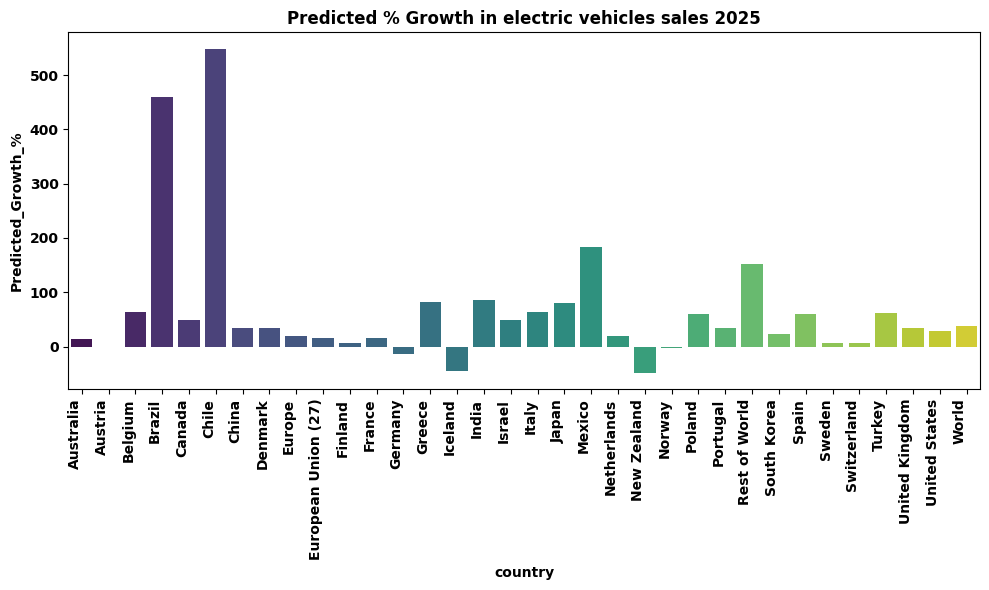

In [625]:
plt.figure(figsize=(10,6))
sns.barplot(data=compare_df1,x='country',y='Predicted_Growth_%', palette='viridis')
plt.title('Predicted % Growth in electric vehicles sales 2025', fontweight='bold')
plt.xlabel('country', fontweight='bold')
plt.ylabel('Predicted_Growth_%', fontweight='bold')
plt.xticks(rotation=90,ha='right', fontweight='bold')
plt.yticks(fontweight='bold')
plt.tight_layout()
plt.show()

Countries with already high EV market share often have a lower growth rate because their market is closer to saturation, while emerging markets can show dramatic growth rates from a smaller base.

**Highest Growth Markets (Emerging Adoption):**

**Chile and Brazil** are predicted to have the most explosive growth, with sales volumes projected to increase by over 100% (around 125% and 110%, respectively).

**Turkey** is also predicted to see very high growth, around 90%.

This strongly suggests that EV adoption in these Latin American and emerging European/Asian markets is in the very early, high-acceleration phase.

**Mid-to-High Growth Markets (Strong Momentum):**

**India, Mexico, and South Korea** are predicted to have strong, double-digit growth rates, ranging from roughly 65% down to 40%.

These are also large, high-potential markets where the EV transition is gaining significant momentum.

**Developed Markets (Moderate Growth):**

Countries with already established high EV market shares tend to show more moderate growth rates:

**Germany and France** are in the low 20s percent.

**China** is predicted to grow by around 15-20%.

**The United States** is predicted to have the lowest growth rate, at about 10%.

###**TASK 2: To train a model to predict next year’s growth (%) in electric car sales based on the current year’s %_electric_cars_sold.**

**Data preparation for task 2**

In [626]:
# Preparing Data for Task 2
q2_df1 = df.copy().sort_values(by=['country', 'Year'])

# Creating a lag feature for previous year's electric share
q2_df1['electric_previous_year'] = q2_df1.groupby('country')['%_electric_cars_sold'].shift(1)

# Creating target variable: next year's growth in electric share
q2_df1['electric_growth'] = q2_df1['%_electric_cars_sold'] - q2_df1['electric_previous_year']

# Dropping missing values caused by shifting
q2_df1 = q2_df1.dropna(subset=['electric_previous_year', 'electric_growth'])

# Features and target
X = q2_df1[['Year', 'electric_previous_year']]
y = q2_df1['electric_growth']

# Splitting into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Train shape:", X_train.shape, "Test shape:", X_test.shape)


Train shape: (327, 2) Test shape: (82, 2)


**Predicting with Linear Regression**

Linear Regression:
R² Score for linear Q2: 0.2480237997605964
MEAN SQUARE ERROR  for linear Q2: 7.814666625042358


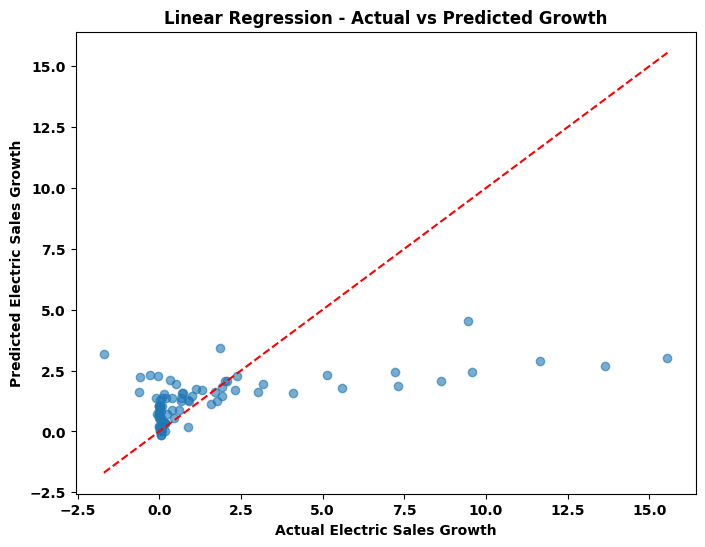

In [627]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Predicting
y_pred = lin_reg.predict(X_test)

# Evaluating
print("Linear Regression:")

#R2 SCORE FOR LINEAR REGRESSION FOR QUESTION 2
r2_score_linearq2=r2_score(y_test,y_pred)
print("R² Score for linear Q2:", r2_score_linearq2)

#MEAN SQUARE (MSE) FOR LINEAR REGRESSION FOR QUESTION 2
mse_linearq2 = mean_squared_error(y_test, y_pred) # Calculating MSE
print("MEAN SQUARE ERROR  for linear Q2:", mse_linearq2)


# Ploting actual vs predicted
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Electric Sales Growth", fontweight='bold')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.ylabel("Predicted Electric Sales Growth", fontweight='bold')
plt.title("Linear Regression - Actual vs Predicted Growth", fontweight='bold')
plt.show()



**Predicting with Ridge Regression**

Ridge Regression:
R² Score Ridge Q2: 0.2480233425992563
MEAN SQUARE ERROR Ridge Q2: 7.814671375942009


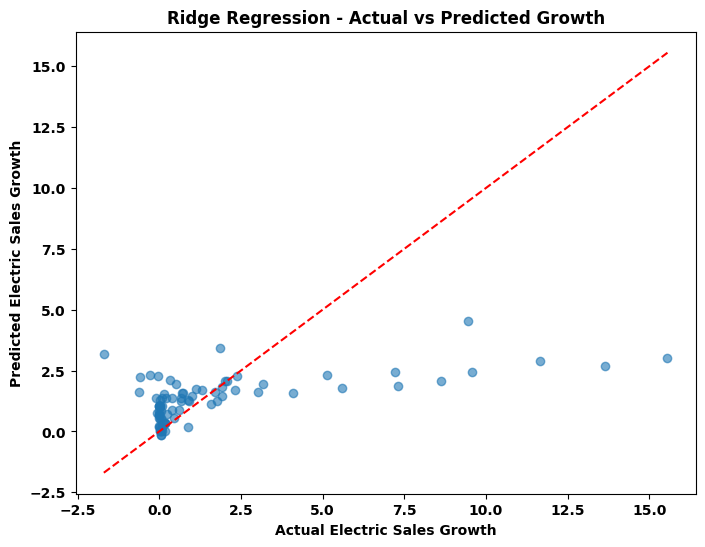

In [628]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

y_pred_ridge = ridge.predict(X_test)

print("Ridge Regression:")

#R2 SCORE FOR RIDGE REGRESSION FOR QUESTION 2
r2_score_ridgeq2=r2_score(y_test,y_pred_ridge)
print("R² Score Ridge Q2:", r2_score(y_test, y_pred_ridge))

#ROOT MEAN SQUARE ERROR (RMSE) FOR RIDGE REGRESSION FOR QUESTION 2
MSE_ridgeq2=mean_squared_error(y_test,y_pred_ridge)
print("MEAN SQUARE ERROR Ridge Q2:", MSE_ridgeq2)

# Ploting actual vs predicted
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_ridge, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Electric Sales Growth", fontweight='bold')
plt.yticks(fontweight='bold')
plt.xticks(fontweight='bold')
plt.ylabel("Predicted Electric Sales Growth", fontweight='bold')
plt.title("Ridge Regression - Actual vs Predicted Growth", fontweight='bold')
plt.show()


**Predicting with Lasso Regression**

Lasso Regression:
R² Score for lasso regression Q2: 0.246388685993013
MSE Lasso for Q2: 7.831659009885939


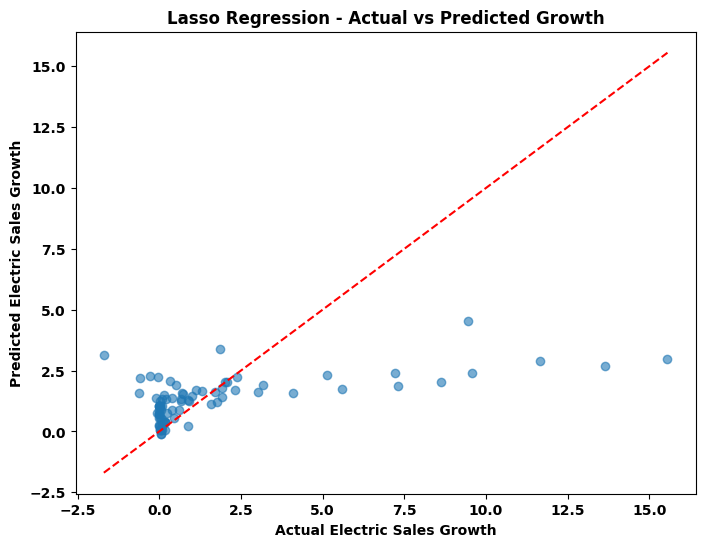

In [629]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

y_pred_lasso = lasso.predict(X_test)

print("Lasso Regression:")

#R2 SCORE FOR LASSO REGRESSION FOR QUESTION 2
r2_score_lassoq2=r2_score(y_test,y_pred_lasso)
print("R² Score for lasso regression Q2:", r2_score_lassoq2)

#ROOT MEAN SQUARE ERROR FOR LASSO REGRESSION FOR QUESTION 2
MSE_lassoq2=mean_squared_error(y_test,y_pred_lasso)
print("MSE Lasso for Q2:", MSE_lassoq2)

# Ploting actual vs predicted
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_lasso, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Electric Sales Growth", fontweight='bold')
plt.yticks(fontweight='bold')
plt.xticks(fontweight='bold')
plt.ylabel("Predicted Electric Sales Growth", fontweight='bold')
plt.title("Lasso Regression - Actual vs Predicted Growth", fontweight='bold')
plt.show()


###**Models performance comparisons**

/tmp/ipython-input-284242929.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_q2, x='Model', y='R2', palette='Reds')
/tmp/ipython-input-284242929.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_q2, x='Model', y='MSE', palette='viridis')


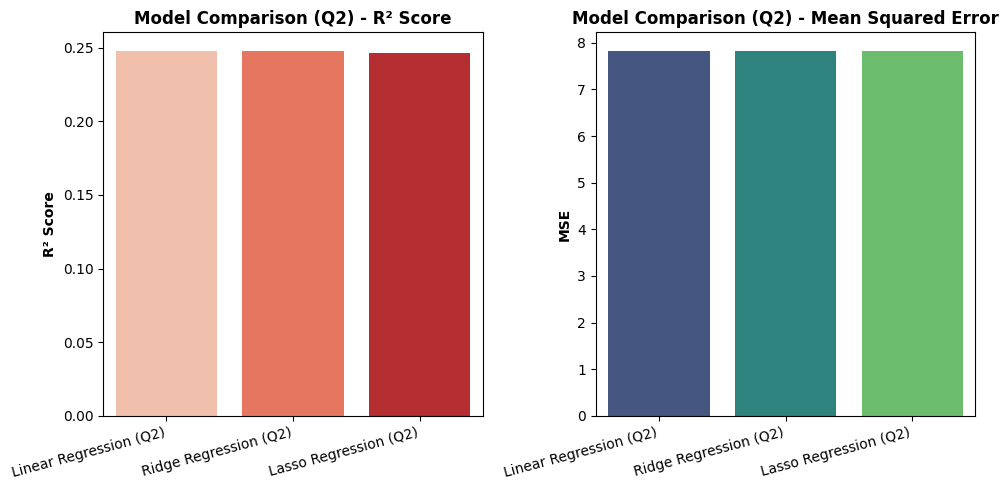

,Model,R2,MSE
0,Linear Regression (Q2),0.248024,7.814667
1,Ridge Regression (Q2),0.248023,7.814671
2,Lasso Regression (Q2),0.246389,7.831659


In [630]:
#Creating a comparison DataFrame using the existing variables
results_q2 = pd.DataFrame({
    'Model': ['Linear Regression (Q2)', 'Ridge Regression (Q2)', 'Lasso Regression (Q2)'],
    'R2': [r2_score_linearq2, r2_score_ridgeq2, r2_score_lassoq2],
    'MSE': [mse_linearq2, MSE_ridgeq2, MSE_lassoq2]
})

#Plotting performance comparison ---
plt.figure(figsize=(10,5))

# Plotting R² scores
plt.subplot(1, 2, 1)
sns.barplot(data=results_q2, x='Model', y='R2', palette='Reds')
plt.title("Model Comparison (Q2) - R² Score", fontweight='bold')
plt.ylabel("R² Score", fontweight='bold')
plt.xlabel("")
plt.xticks(rotation=15, ha='right')

# Plotting MSE values
plt.subplot(1, 2, 2)
sns.barplot(data=results_q2, x='Model', y='MSE', palette='viridis')
plt.title("Model Comparison (Q2) - Mean Squared Error", fontweight='bold')
plt.ylabel("MSE", fontweight='bold')
plt.xlabel("")
plt.xticks(rotation=15, ha='right')

plt.tight_layout()
plt.show()

#Displaying results table
display(results_q2.sort_values('R2', ascending=False))


**MODEL VERDICT FOR TASK 2**

**Low explanatory power (R² = 0.24)**

The model explains only 24% of the variation in electric vehicle sales growth in the coming years.

That means most of what drives the outcome is still unexplained. For example, there is a posibility of missing data, available non-linear trends, or unmodeled influences (like policies, prices, or technology changes).

**Prediction uncertainty**

The model’s average error (≈ 2.8 units) means predictions could easily be several percentage points off.

That level of error can change the direction of a decision. For instance, predicting 10% growth vs 7% can alter an investment plan.

###**CONCLUSION**

The regression-based analysis revealed strong predictive relationships in global electric vehicle adoption patterns.

**For Question 1** — predicting electric car share based on previous years — the models achieved **R² ≈ 0.90 and MSE ≈ 6**, indicating excellent predictive accuracy. This demonstrates that **past EV adoption trends are highly indicative of future adoption, showing a stable, linear growth pattern across countries.**

**For Question 2** — predicting next-year growth in EV sales — the models achieved **R² ≈ 0.24 and MSE ≈ 7.8**, suggesting moderate predictive power. **This indicates that short-term growth in EV sales may depend on additional external factors (such as policy changes, fuel prices, or supply-chain dynamics) not captured in the dataset.**

**Among the models tested:**

**Linear Regression performed strongly, capturing the primary relationship efficiently.**

**Ridge Regression provided similar performance, helping reduce the risk of overfitting.**

**Lasso Regression yielded nearly identical accuracy, offering model simplicity and feature selection advantages.**

Overall, the findings suggest that **EV adoption follows a consistent historical trend,** making regression analysis a useful tool for short-term forecasting.

This project demonstrates how data-driven modeling can be used to forecast clean energy transitions, contributing to global sustainability and climate action goals.